<a href="https://colab.research.google.com/github/arutraj/ML_Basics/blob/main/ClusterQuest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install networkx --upgrade

In [ ]:
!pip install matplotlib --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 14.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [2]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 

In [3]:
!pip install igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 13.0 MB/s eta 0:00:00


In [11]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

In [5]:
from igraph import Graph
igraph_fb = Graph.Read('/content/drive/MyDrive/facebook_combined.txt', directed = False)

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G1 =nx.read_edgelist("/content/drive/MyDrive/facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

[107, 1684, 3437, 1912, 1085]

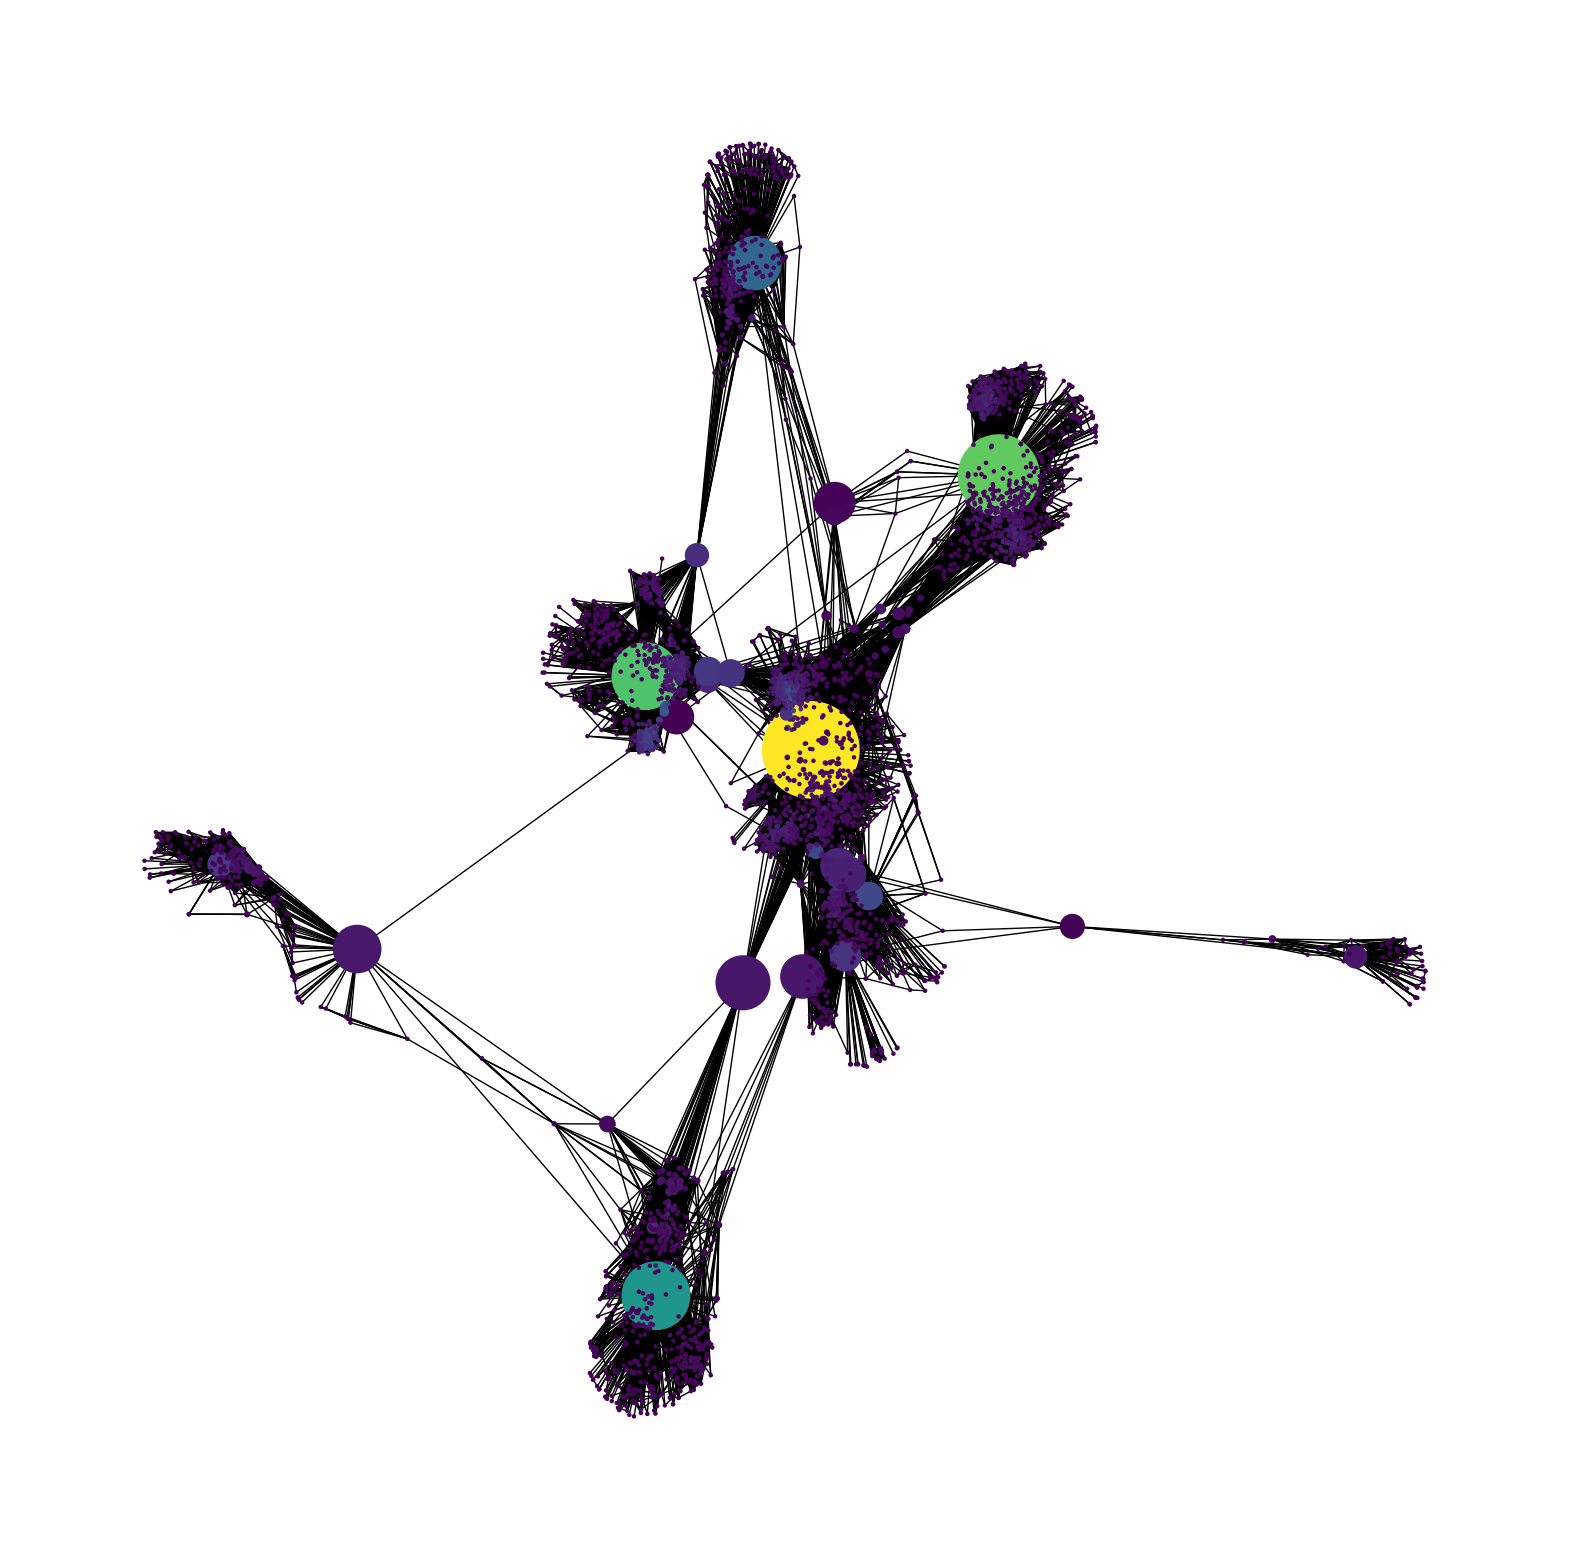

In [8]:
pos = nx.spring_layout(G1)
betCent = nx.betweenness_centrality(G1, normalized=True, endpoints=True)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
sorted(betCent, key=betCent.get, reverse=True)[:5]

In [5]:
import networkx as nx
nx_graph = nx.read_edgelist('/content/drive/MyDrive/facebook_combined.txt')



In [7]:
deg_centrality = nx.degree_centrality(nx_graph)
print(list(deg_centrality.values())[0:10])

[0.08593363051015354, 0.004210004952947003, 0.0024764735017335313, 0.004210004952947003, 0.0024764735017335313, 0.0032194155522535907, 0.0014858841010401188, 0.004952947003467063, 0.001981178801386825, 0.014115898959881128]


In [8]:
clustering_coef = nx.clustering(nx_graph)
print(list(clustering_coef.values())[0:10])


[0.04196165314587463, 0.41911764705882354, 0.8888888888888888, 0.6323529411764706, 0.8666666666666667, 0.3333333333333333, 0.9333333333333333, 0.43157894736842106, 0.6785714285714286, 0.39724310776942356]


In [10]:
print(nx_graph.number_of_nodes())
nx_graph.number_of_edges()

4039


88234

In [11]:
node_degree = nx_graph.degree()
#node_degreei = igraph_fb.degree()
print(node_degree)
#print(node_degreei)

[('0', 347), ('1', 17), ('2', 10), ('3', 17), ('4', 10), ('5', 13), ('6', 6), ('7', 20), ('8', 8), ('9', 57), ('10', 10), ('11', 1), ('12', 1), ('13', 31), ('14', 15), ('15', 1), ('16', 9), ('17', 13), ('18', 1), ('19', 16), ('20', 15), ('21', 65), ('22', 11), ('23', 17), ('24', 16), ('25', 69), ('26', 68), ('27', 5), ('28', 13), ('29', 13), ('30', 17), ('31', 23), ('32', 6), ('33', 2), ('34', 5), ('35', 2), ('36', 11), ('37', 1), ('38', 9), ('39', 15), ('40', 44), ('41', 24), ('42', 2), ('43', 1), ('44', 6), ('45', 12), ('46', 5), ('47', 2), ('48', 22), ('49', 4), ('50', 11), ('51', 7), ('52', 2), ('53', 31), ('54', 8), ('55', 17), ('56', 78), ('57', 15), ('58', 12), ('59', 19), ('60', 8), ('61', 3), ('62', 26), ('63', 6), ('64', 7), ('65', 12), ('66', 15), ('67', 76), ('68', 9), ('69', 10), ('70', 2), ('71', 3), ('72', 24), ('73', 10), ('74', 1), ('75', 14), ('76', 3), ('77', 6), ('78', 9), ('79', 12), ('80', 23), ('81', 3), ('82', 34), ('83', 7), ('84', 13), ('85', 14), ('86', 6), (

In [9]:
X = np.column_stack((list(deg_centrality.values()), list(clustering_coef.values())))
print(X.shape)
print(X[0:10])

(4039, 2)
[[0.08593363 0.04196165]
 [0.00421    0.41911765]
 [0.00247647 0.88888889]
 [0.00421    0.63235294]
 [0.00247647 0.86666667]
 [0.00321942 0.33333333]
 [0.00148588 0.93333333]
 [0.00495295 0.43157895]
 [0.00198118 0.67857143]
 [0.0141159  0.39724311]]


In [12]:
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled.shape)
print(X_scaled[0:10])

(4039, 2)
[[ 5.7867806  -2.62822483]
 [-0.50923329 -0.86939407]
 [-0.6427851   1.321339  ]
 [-0.50923329  0.12500824]
 [-0.6427851   1.2177078 ]
 [-0.58554861 -1.26944098]
 [-0.71910042  1.5286014 ]
 [-0.4519968  -0.81128199]
 [-0.68094276  0.34054372]
 [ 0.25391991 -0.97140388]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

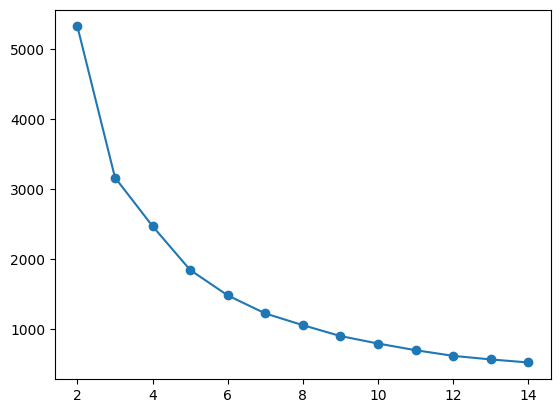

In [13]:
sse = []
silhouette_scores_kmeans = []
db_scores_kmeans = []
trial_num_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
for num_clusters in trial_num_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    silhouette_scores_kmeans.append(silhouette_score(X_scaled, kmeans.labels_, metric='euclidean'))
    db_scores_kmeans.append(davies_bouldin_score(X_scaled, kmeans.labels_))
x = np.array([i for i in range(2,15)])
plt.plot(x, sse, marker = 'o')

In [12]:
# captture nodes in 2 separate lists
node_list_1 = []
node_list_2 = []

for i in tqdm(node_degree):
  node_list_1.append(i[0])
  node_list_2.append(i[1])

fb_df = pd.DataFrame({'node_1': node_list_1, 'node_2': node_list_2})

100%|██████████| 4039/4039 [00:00<00:00, 500348.33it/s]


In [13]:
fb_df.head()

,node_1,node_2
0,0,347
1,1,17
2,2,10
3,3,17
4,4,10


In [ ]:
np.mean([d for _, d in fb_df.degree()])

In [14]:
# build graph
G_data = nx.from_pandas_edgelist(fb_df, "node_1", "node_2", create_using=nx.Graph())

In [ ]:
from node2vec import Node2Vec

# Generate walks
node2vec = Node2Vec(G_data, dimensions=100, walk_length=16, num_walks=50)

# train node2vec model
n2w_model = node2vec.fit(window=7, min_count=1)

In [ ]:
!pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.4 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0

In [16]:
from pycaret.clustering import *
s = setup(fb_df)

,Description,Value
0,Session id,6382
1,Original data shape,"(4039, 2)"
2,Transformed data shape,"(4039, 4040)"
3,Numeric features,1
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [17]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


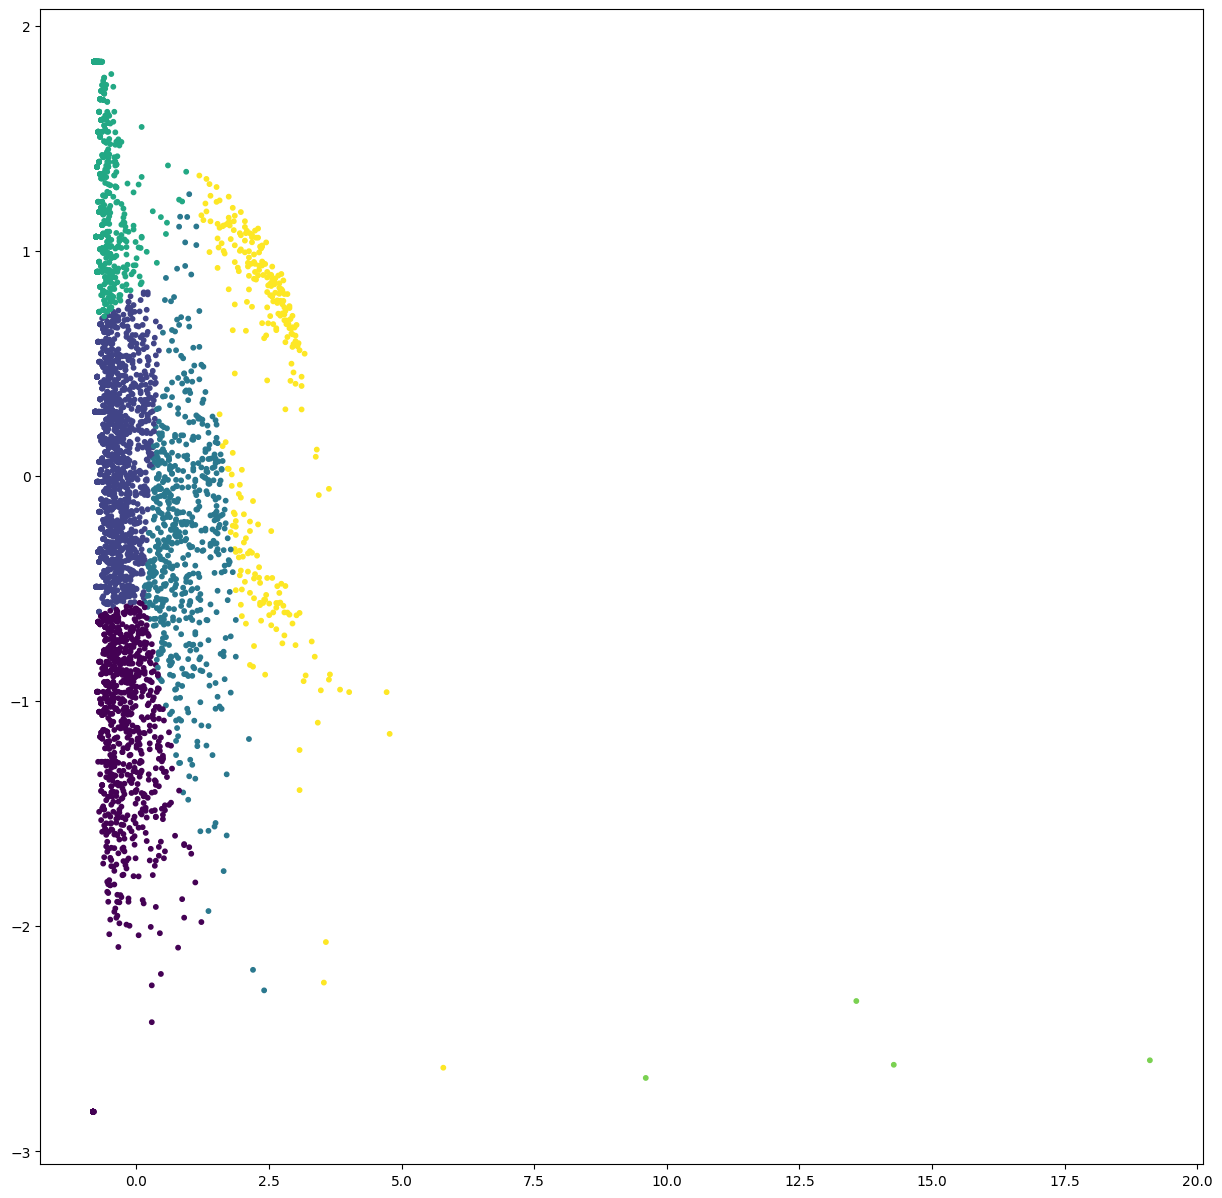

In [16]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_scaled)
plt.figure(figsize =(15, 15))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, s=10)

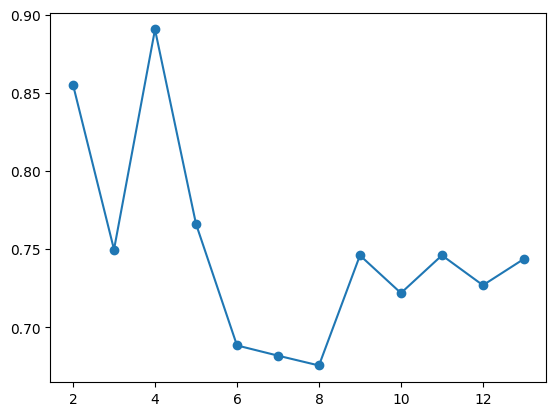

In [17]:
silhouette_scores_agg = []
db_scores_agg = []
trial_num_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14]
for num_clusters in trial_num_clusters:
    agg = AgglomerativeClustering(n_clusters = num_clusters).fit(X_scaled)
    silhouette_scores_agg.append(silhouette_score(X_scaled, agg.labels_, metric='euclidean'))
    db_scores_agg.append(davies_bouldin_score(X_scaled, agg.labels_))
x = np.array([i for i in range(2,14)])
# plt.plot(x, silhouette_scores_agg, marker = 'o')
plt.plot(x, db_scores_agg, marker = 'o')
# so 8 is the best (the lower the better)

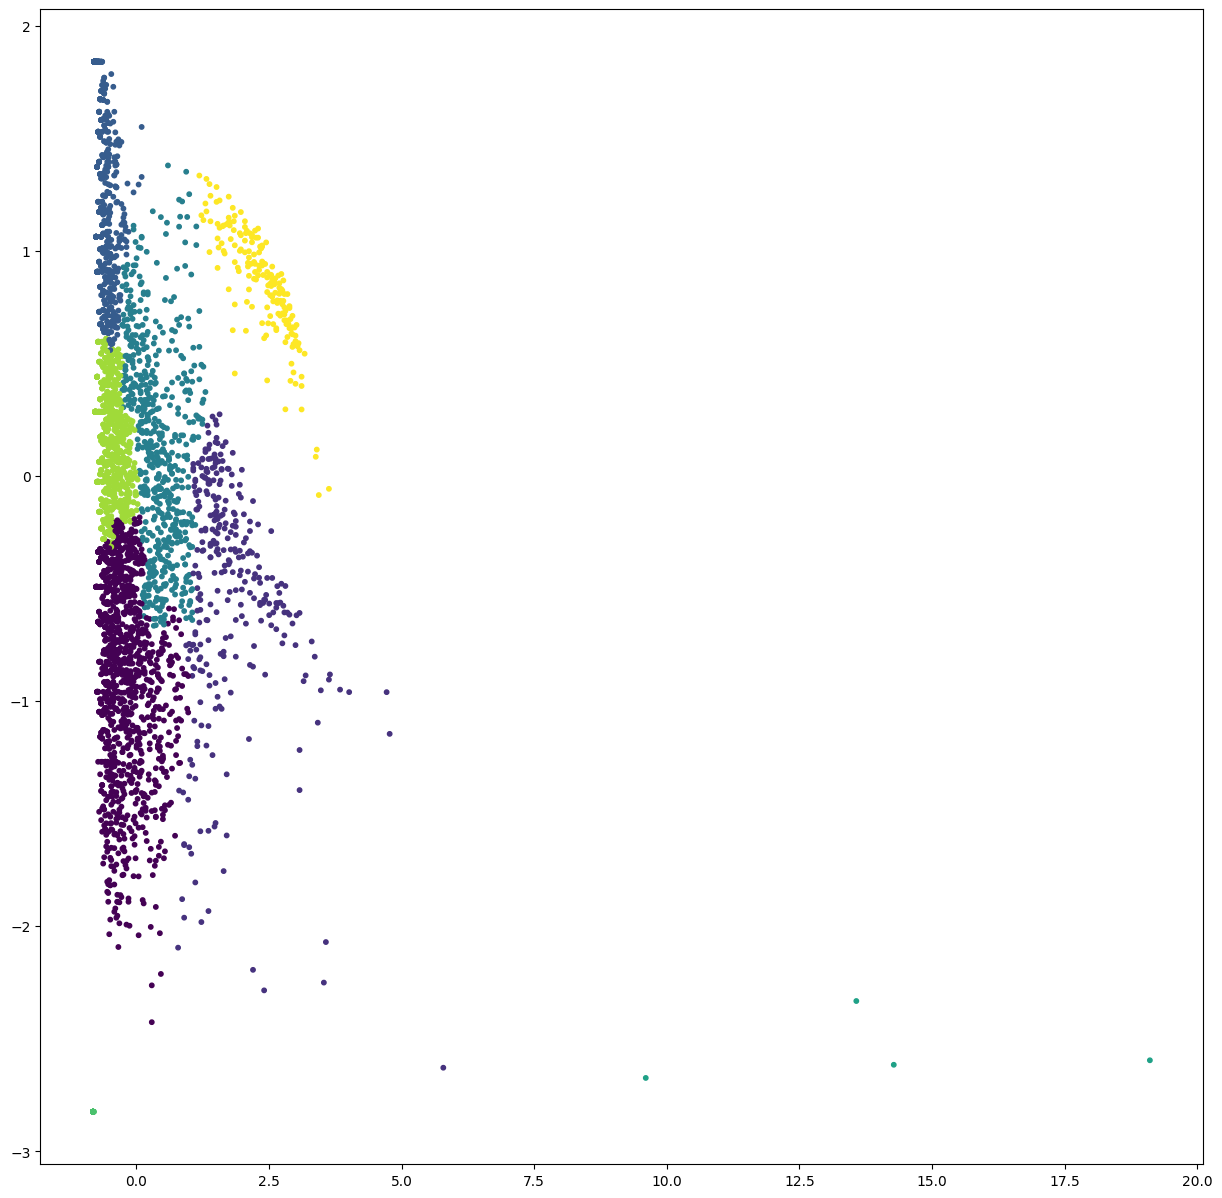

In [18]:
agg = AgglomerativeClustering(n_clusters = 8).fit(X_scaled)
plt.figure(figsize =(15, 15))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agg.labels_, s=10)

In [20]:
epsilon = 0.3
while epsilon <= 0.8:
  for minimum_samples in range (10, 101, 10):
     dbscan = DBSCAN(eps = epsilon, min_samples=minimum_samples)
     dbscan_clusters = dbscan.fit_predict(X_scaled)
     silhouette_avg = silhouette_score(X_scaled, dbscan.labels_)
     db_score = davies_bouldin_score(X_scaled, dbscan.labels_)
     print(epsilon)
     print(minimum_samples)
     print(silhouette_avg)
     print(db_score)
     print(len(np.unique(dbscan_clusters)))
     print('-----------')
  epsilon += 0.1

0.3
10
0.46435741687356147
0.7215698970497421
3
-----------
0.3
20
0.3998037810995073
1.1957778916796504
4
-----------
0.3
30
0.4038702022983336
1.214796745806245
4
-----------
0.3
40
0.41232091186732367
1.1133282514061393
4
-----------
0.3
50
0.41061043056695246
1.1147040693734875
4
-----------
0.3
60
0.4029218483365167
1.0826450369560368
4
-----------
0.3
70
0.42176016731970145
0.7735910832093994
3
-----------
0.3
80
0.24383893807609153
3.490948130998284
3
-----------
0.3
90
0.44915048162193605
1.2500892649970377
2
-----------
0.3
100
0.44027746058889994
1.2589311245285797
2
-----------
0.4
10
0.47363157795665
0.7361227020179798
3
-----------
0.4
20
0.46901381064728326
0.7455180088277542
3
-----------
0.4
30
0.4007734556260946
0.9362832518929094
4
-----------
0.4
40
0.4021139947583856
1.1385242084195837
4
-----------
0.4
50
0.40770825446524667
1.1652193296933264
4
-----------
0.4
60
0.4105811122596619
1.1643513587521939
4
-----------
0.4
70
0.41453810677512776
1.2228932017926961
4
--

In [21]:
dbscan = DBSCAN(eps = 0.8, min_samples=10)
dbscan_clusters = dbscan.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, dbscan.labels_)
db_score = davies_bouldin_score(X_scaled, dbscan.labels_)
print('Silhouette score = %f' % silhouette_avg)
print('DB index = %f' % db_score)
print('Total effective clusters (2 assigned + 1 unassinged) = %d' % len(np.unique(dbscan_clusters)))

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise_ = list(dbscan.labels_).count(-1)

print("Number of clusters: %d" % n_clusters_)
print("Number of noise points: %d" % n_noise_)

Silhouette score = 0.473324
DB index = 0.624233
Total effective clusters (2 assigned + 1 unassinged) = 3
Number of clusters: 2
Number of noise points: 8


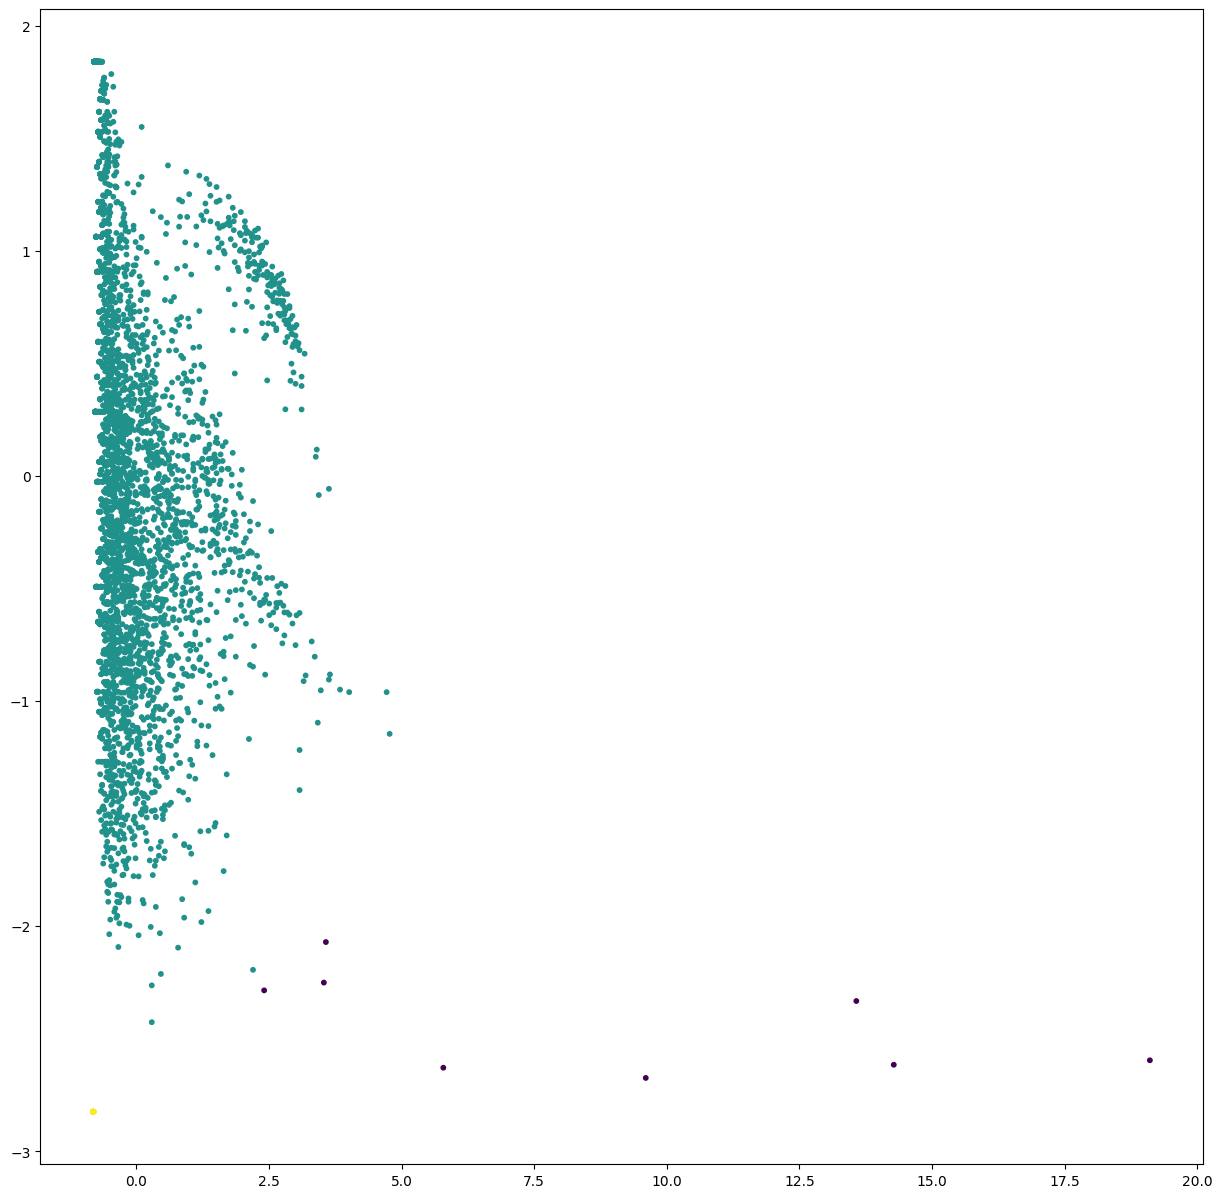

In [22]:
plt.figure(figsize =(15, 15))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan.labels_, s=10)

In [18]:
kmeans = create_model('kmeans', num_clusters = 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5822,14922.1644,0.4630,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
kmeans_results = assign_model(kmeans)
kmeans_results.head()

,node_1,node_2,Cluster
0,0,347,Cluster 4
1,1,17,Cluster 0
2,2,10,Cluster 0
3,3,17,Cluster 0
4,4,10,Cluster 0


In [19]:
plot_model(kmeans)

In [20]:
max(x for x,y in nx.degree(G1))

4038

In [ ]:
plot_model(kmeans, plot = 'tsne')

In [ ]:
dbs = create_model('dbscan')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
H = nx.DiGraph(nx_graph)
list(H.edges())

In [ ]:
# plot graph
plt.figure(figsize=(10,10))

pos = nx.random_layout(nx.graph)
nx.draw(nx.graph, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)



In [ ]:
sub_avgdeg = []
import numpy as np
for vertex in igraph_fb.vs:
  # Get the neighbors of the vertex, order =2 limits the subgraph to
  # 2 hop i.e, only immediate neighbors and their immediate
  # neighbors for this node will be considered.
  neighbors_within_2_hops = igraph_fb.neighborhood(vertex, order = 2)
  subgraph = igraph_fb.subgraph(neighbors_within_2_hops)

  sub_avgdeg.append(np.array(subgraph.degree()).mean())

In [ ]:
# prompt: print sub_avgdeg with all neighbors nodes and vertices

for i, vertex in enumerate(igraph_fb.vs):
  neighbors_within_2_hops = igraph_fb.neighborhood(vertex, order = 2)
  subgraph = igraph_fb.subgraph(neighbors_within_2_hops)
  print("Node:", vertex.index, "Average degree:", np.array(subgraph.degree()).mean())


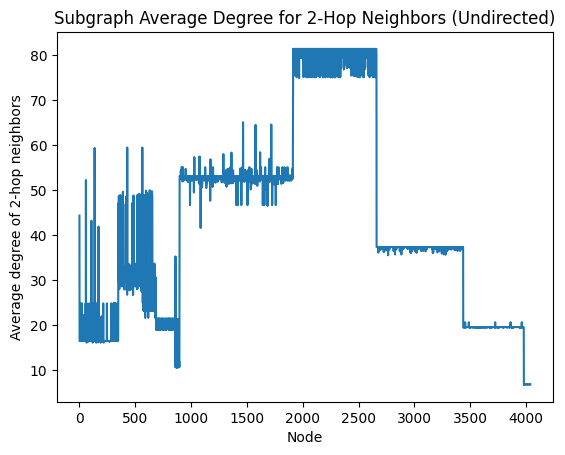

In [ ]:
# prompt: plot sub_avgdeg undirected graph

# Plot the sub_avgdeg list as an undirected graph
import matplotlib.pyplot as plt

plt.plot(sub_avgdeg)
plt.xlabel("Node")
plt.ylabel("Average degree of 2-hop neighbors")
plt.title("Subgraph Average Degree for 2-Hop Neighbors (Undirected)")
plt.show()
